In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn import metrics,preprocessing

from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC

from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from statistics import mode


In [252]:
heart= pd.read_csv("Heart_Disease_Data-1.csv")

In [171]:
heart.head()

,Age,Gender,CP,Rest_BPS,Cholestrol,FBS,Rest_ECG,Thalach,Exang,Old_Peak,Slop,CA,Thal,Heart_Pain_level
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [172]:
heart.shape

(303, 14)

In [173]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
Age                 303 non-null int64
Gender              303 non-null int64
CP                  303 non-null int64
Rest_BPS            303 non-null int64
Cholestrol          303 non-null int64
FBS                 303 non-null int64
Rest_ECG            303 non-null int64
Thalach             303 non-null int64
Exang               303 non-null int64
Old_Peak            303 non-null float64
Slop                303 non-null int64
CA                  303 non-null object
Thal                303 non-null object
Heart_Pain_level    303 non-null int64
dtypes: float64(1), int64(11), object(2)
memory usage: 33.2+ KB


There are no null values in our data.

In [174]:
heart.isnull().sum()

Age                 0
Gender              0
CP                  0
Rest_BPS            0
Cholestrol          0
FBS                 0
Rest_ECG            0
Thalach             0
Exang               0
Old_Peak            0
Slop                0
CA                  0
Thal                0
Heart_Pain_level    0
dtype: int64

In [175]:
heart.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
Gender,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
CP,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
Rest_BPS,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
Cholestrol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
FBS,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
Rest_ECG,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
Thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
Exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
Old_Peak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


## Univariate Analysis

1    206
0     97
Name: Gender, dtype: int64


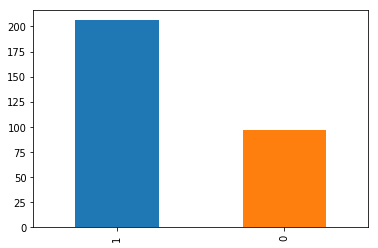

In [176]:
print(heart['Gender'].value_counts())
heart['Gender'].value_counts().plot.bar()

Male Patients are more in number than female patients

4    144
3     86
2     50
1     23
Name: CP, dtype: int64


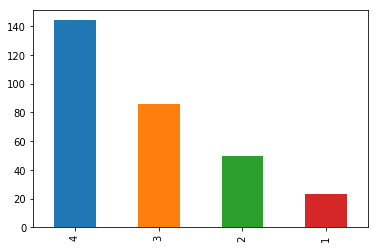

In [177]:
print(heart['CP'].value_counts())
heart['CP'].value_counts().plot.bar()

Chest Pain level 4 was maximum in frequency

0    258
1     45
Name: FBS, dtype: int64


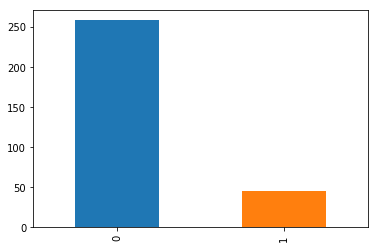

In [178]:
print(heart['FBS'].value_counts())
heart['FBS'].value_counts().plot.bar()

0    151
2    148
1      4
Name: Rest_ECG, dtype: int64


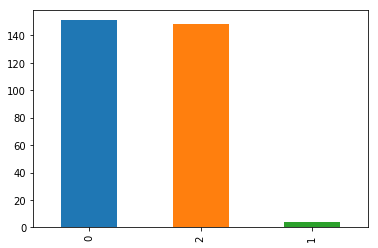

In [179]:
print(heart['Rest_ECG'].value_counts())
heart['Rest_ECG'].value_counts().plot.bar()

Patients with normal and showing probable or definite left ventricular hypertrophy are maximum in number,mm and are almost proportional

0    204
1     99
Name: Exang, dtype: int64


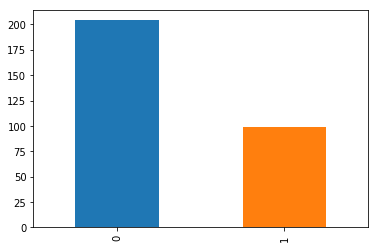

In [180]:
print(heart['Exang'].value_counts())
heart['Exang'].value_counts().plot.bar()

Most patients donot have exercise induced angina 

1    142
2    140
3     21
Name: Slop, dtype: int64


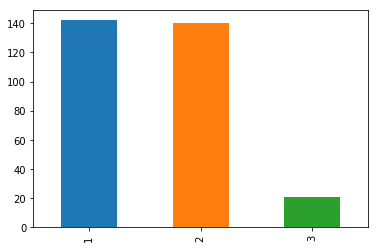

In [181]:
print(heart['Slop'].value_counts())
heart['Slop'].value_counts().plot.bar()

upslope and rest value of the slope of the peak exercise ST segment are max in value and are proportional

0    176
1     65
2     38
3     20
?      4
Name: CA, dtype: int64


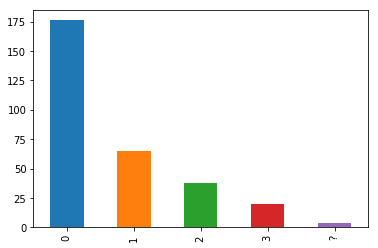

In [182]:
print(heart['CA'].value_counts())
heart['CA'].value_counts().plot.bar()

0 Number of major vessels (0-3) colored by flourosopy were maximum in number. There are some '?' values which need to be reduced by the mode value. 

3    166
7    117
6     18
?      2
Name: Thal, dtype: int64


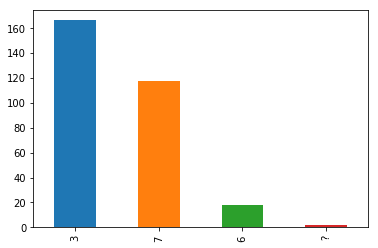

In [183]:
print(heart['Thal'].value_counts())
heart['Thal'].value_counts().plot.bar()

Patients with Normal thalium test value are maximum in number. Patients with reversable defects (7) are also high. There are some '?' values which will be replaced by mode value

0    164
1     55
2     36
3     35
4     13
Name: Heart_Pain_level, dtype: int64


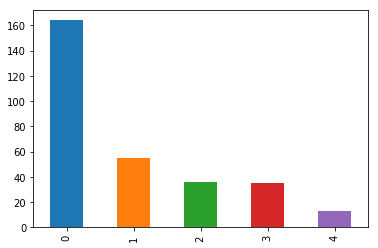

In [184]:
print(heart['Heart_Pain_level'].value_counts())
heart['Heart_Pain_level'].value_counts().plot.bar()

Patients with Heart pain level 0 are maximum in number

In [185]:
heart.columns

Index(['Age', 'Gender', 'CP', 'Rest_BPS', 'Cholestrol', 'FBS', 'Rest_ECG',
       'Thalach', 'Exang', 'Old_Peak', 'Slop', 'CA', 'Thal',
       'Heart_Pain_level'],
      dtype='object')

C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


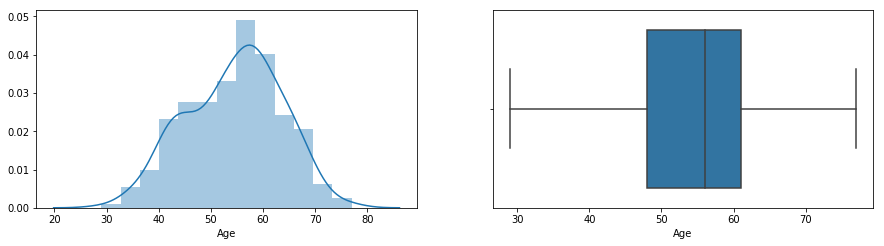

In [186]:
plt.figure(figsize=(15,8))
plt.subplot(221)
sns.distplot(heart["Age"])

plt.subplot(222)
sns.boxplot(heart["Age"])

Data follows gaussian distribution but the curve is not a perfect bell curve. No outliers can be visualized.

C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


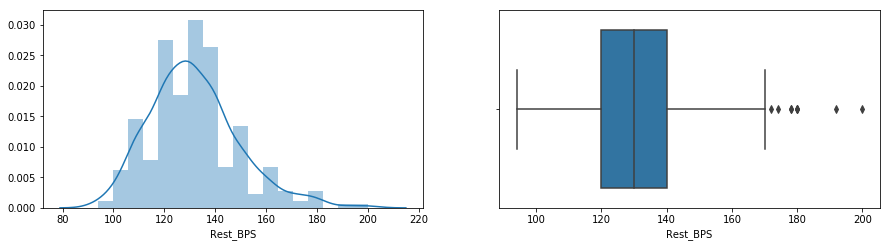

In [187]:
plt.figure(figsize=(15,8))
plt.subplot(221)
sns.distplot(heart["Rest_BPS"])

plt.subplot(222)
sns.boxplot(heart["Rest_BPS"])

Data Follows normal distribution, but there are some outliers present.

C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


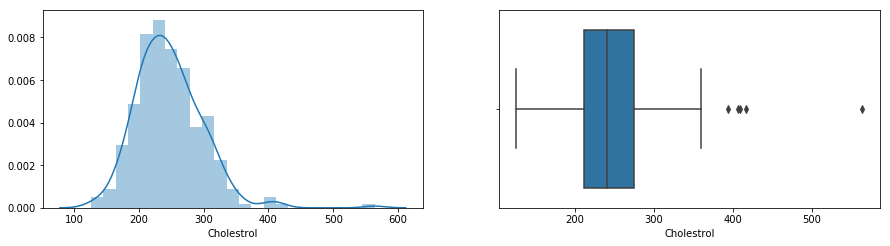

In [188]:
plt.figure(figsize=(15,8))
plt.subplot(221)
sns.distplot(heart["Cholestrol"])

plt.subplot(222)
sns.boxplot(heart["Cholestrol"])

The data is very slightly right skewed and some outliers can be visualized.

C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


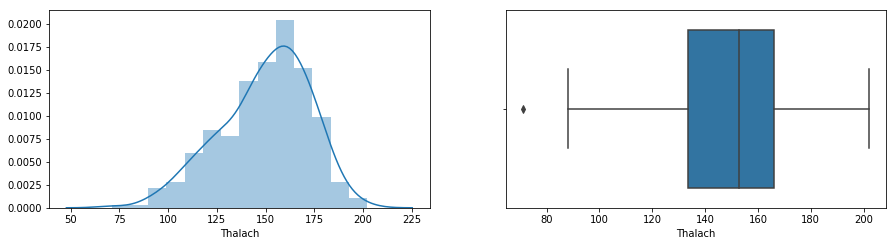

In [189]:
plt.figure(figsize=(15,8))
plt.subplot(221)
sns.distplot(heart["Thalach"])

plt.subplot(222)
sns.boxplot(heart["Thalach"])

The data is slightly left skewed and some outliers can be visualized.

C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


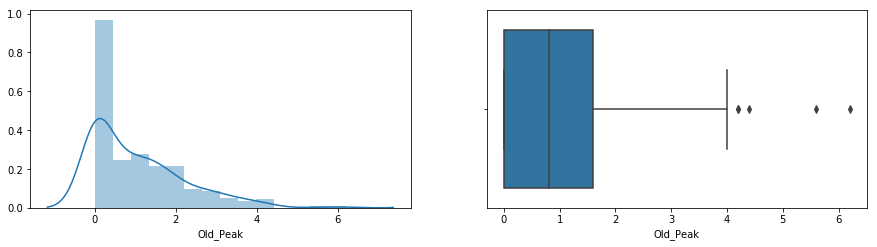

In [190]:
plt.figure(figsize=(15,8))
plt.subplot(221)
sns.distplot(heart["Old_Peak"])

plt.subplot(222)
sns.boxplot(heart["Old_Peak"])

The data highly skewed and there are some outliers

## Bivariate Analysis

Heart_Pain_level   0   1   2   3   4
Gender                              
0                 72   9   7   7   2
1                 92  46  29  28  11


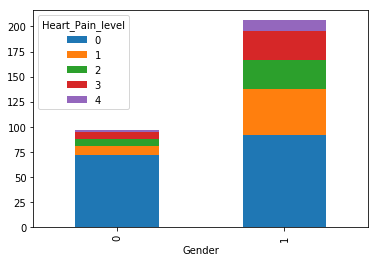

In [191]:
gender_heart = pd.crosstab(heart["Gender"], heart["Heart_Pain_level"])
print(gender_heart)
gender_heart.plot(kind="bar", stacked = True)

Both the genders have 0 heart level at a larger percentage, in males heart level 1 is also large in percentage.

Heart_Pain_level   0   1   2   3   4
CP                                  
1                 16   5   1   0   1
2                 41   6   1   2   0
3                 68   9   4   4   1
4                 39  35  30  29  11


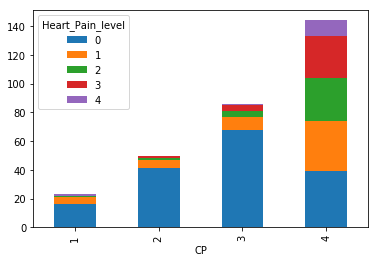

In [192]:
cp_heart = pd.crosstab(heart["CP"], heart["Heart_Pain_level"])
print(cp_heart)
cp_heart.plot(kind="bar", stacked = True)

When there is pain in the chest , it is quite obvious that patients would have some level of heart pain. The intresting observation here is some 
patients would have 0 heart pain level even with a chest pain. This may be a false alarm or chest pain due to some other reason

Heart_Pain_level    0   1   2   3   4
FBS                                  
0                 141  51  27  27  12
1                  23   4   9   8   1


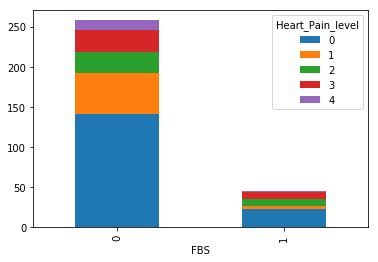

In [193]:
fbs_heart = pd.crosstab(heart["FBS"], heart["Heart_Pain_level"])
print(fbs_heart)
fbs_heart.plot(kind="bar", stacked = True)

Patients with no FBS has maximum no. of people with no heart pain level

Heart_Pain_level   0   1   2   3   4
Rest_ECG                            
0                 95  23  19  12   2
1                  1   0   1   1   1
2                 68  32  16  22  10


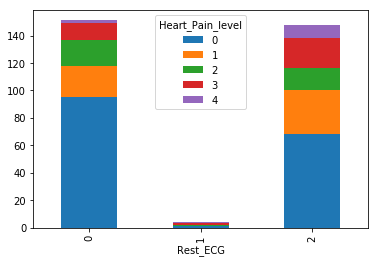

In [194]:
restecg_heart = pd.crosstab(heart["Rest_ECG"], heart["Heart_Pain_level"])
print(restecg_heart)
restecg_heart.plot(kind="bar", stacked = True)

Both the categories contain high percentage of 0 level heart pain

Heart_Pain_level    0   1   2   3  4
Exang                               
0                 141  30  14  12  7
1                  23  25  22  23  6


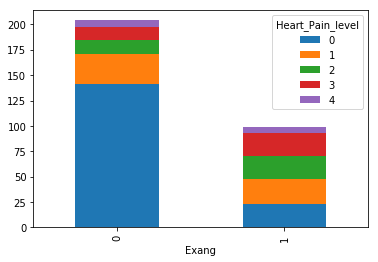

In [195]:
exang_heart = pd.crosstab(heart["Exang"], heart["Heart_Pain_level"])
print(exang_heart)
exang_heart.plot(kind="bar", stacked = True)

Patients with exercise induced angina have equal proportions of heart pain levels 0, 1,2 ,3 and less percentage of level 4

Heart_Pain_level    0   1   2   3   4
Slop                                 
1                 106  22   7   6   1
2                  49  31  26  24  10
3                   9   2   3   5   2


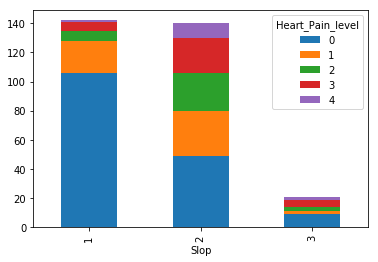

In [196]:
slop_heart = pd.crosstab(heart["Slop"], heart["Heart_Pain_level"])
print(slop_heart)
slop_heart.plot(kind="bar", stacked = True)

For slop 1 , patients with heart pain level 0 are maximum

Heart_Pain_level    0   1   2   3  4
CA                                  
0                 130  26   9   8  3
1                  21  19  14   8  3
2                   7   6   9  14  2
3                   3   3   4   5  5
?                   3   1   0   0  0


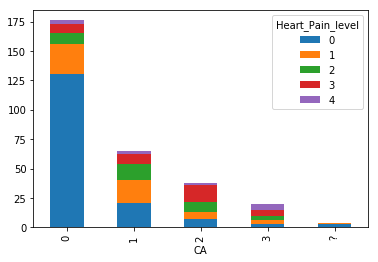

In [197]:
ca_heart = pd.crosstab(heart["CA"], heart["Heart_Pain_level"])
print(ca_heart)
ca_heart.plot(kind="bar", stacked = True)

Patients with 0 CA have maximum percentage of people with 0 heart pain level. pain patients. There are some values assigned as ? which will be treated later 

Heart_Pain_level    0   1   2   3  4
Thal                                
3                 129  22   7   6  2
6                   6   3   6   1  2
7                  28  30  22  28  9
?                   1   0   1   0  0


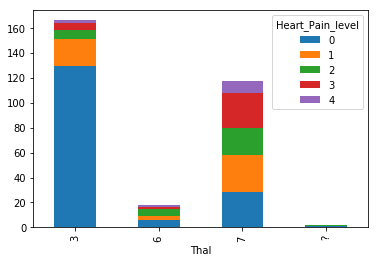

In [198]:
thal_heart = pd.crosstab(heart["Thal"], heart["Heart_Pain_level"])
print(thal_heart)
thal_heart.plot(kind="bar", stacked = True)

Patients with Thalium level 3 have maximum percentage of 0 level heart pain patients. There are some values assigned as ? which will be treated later

C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


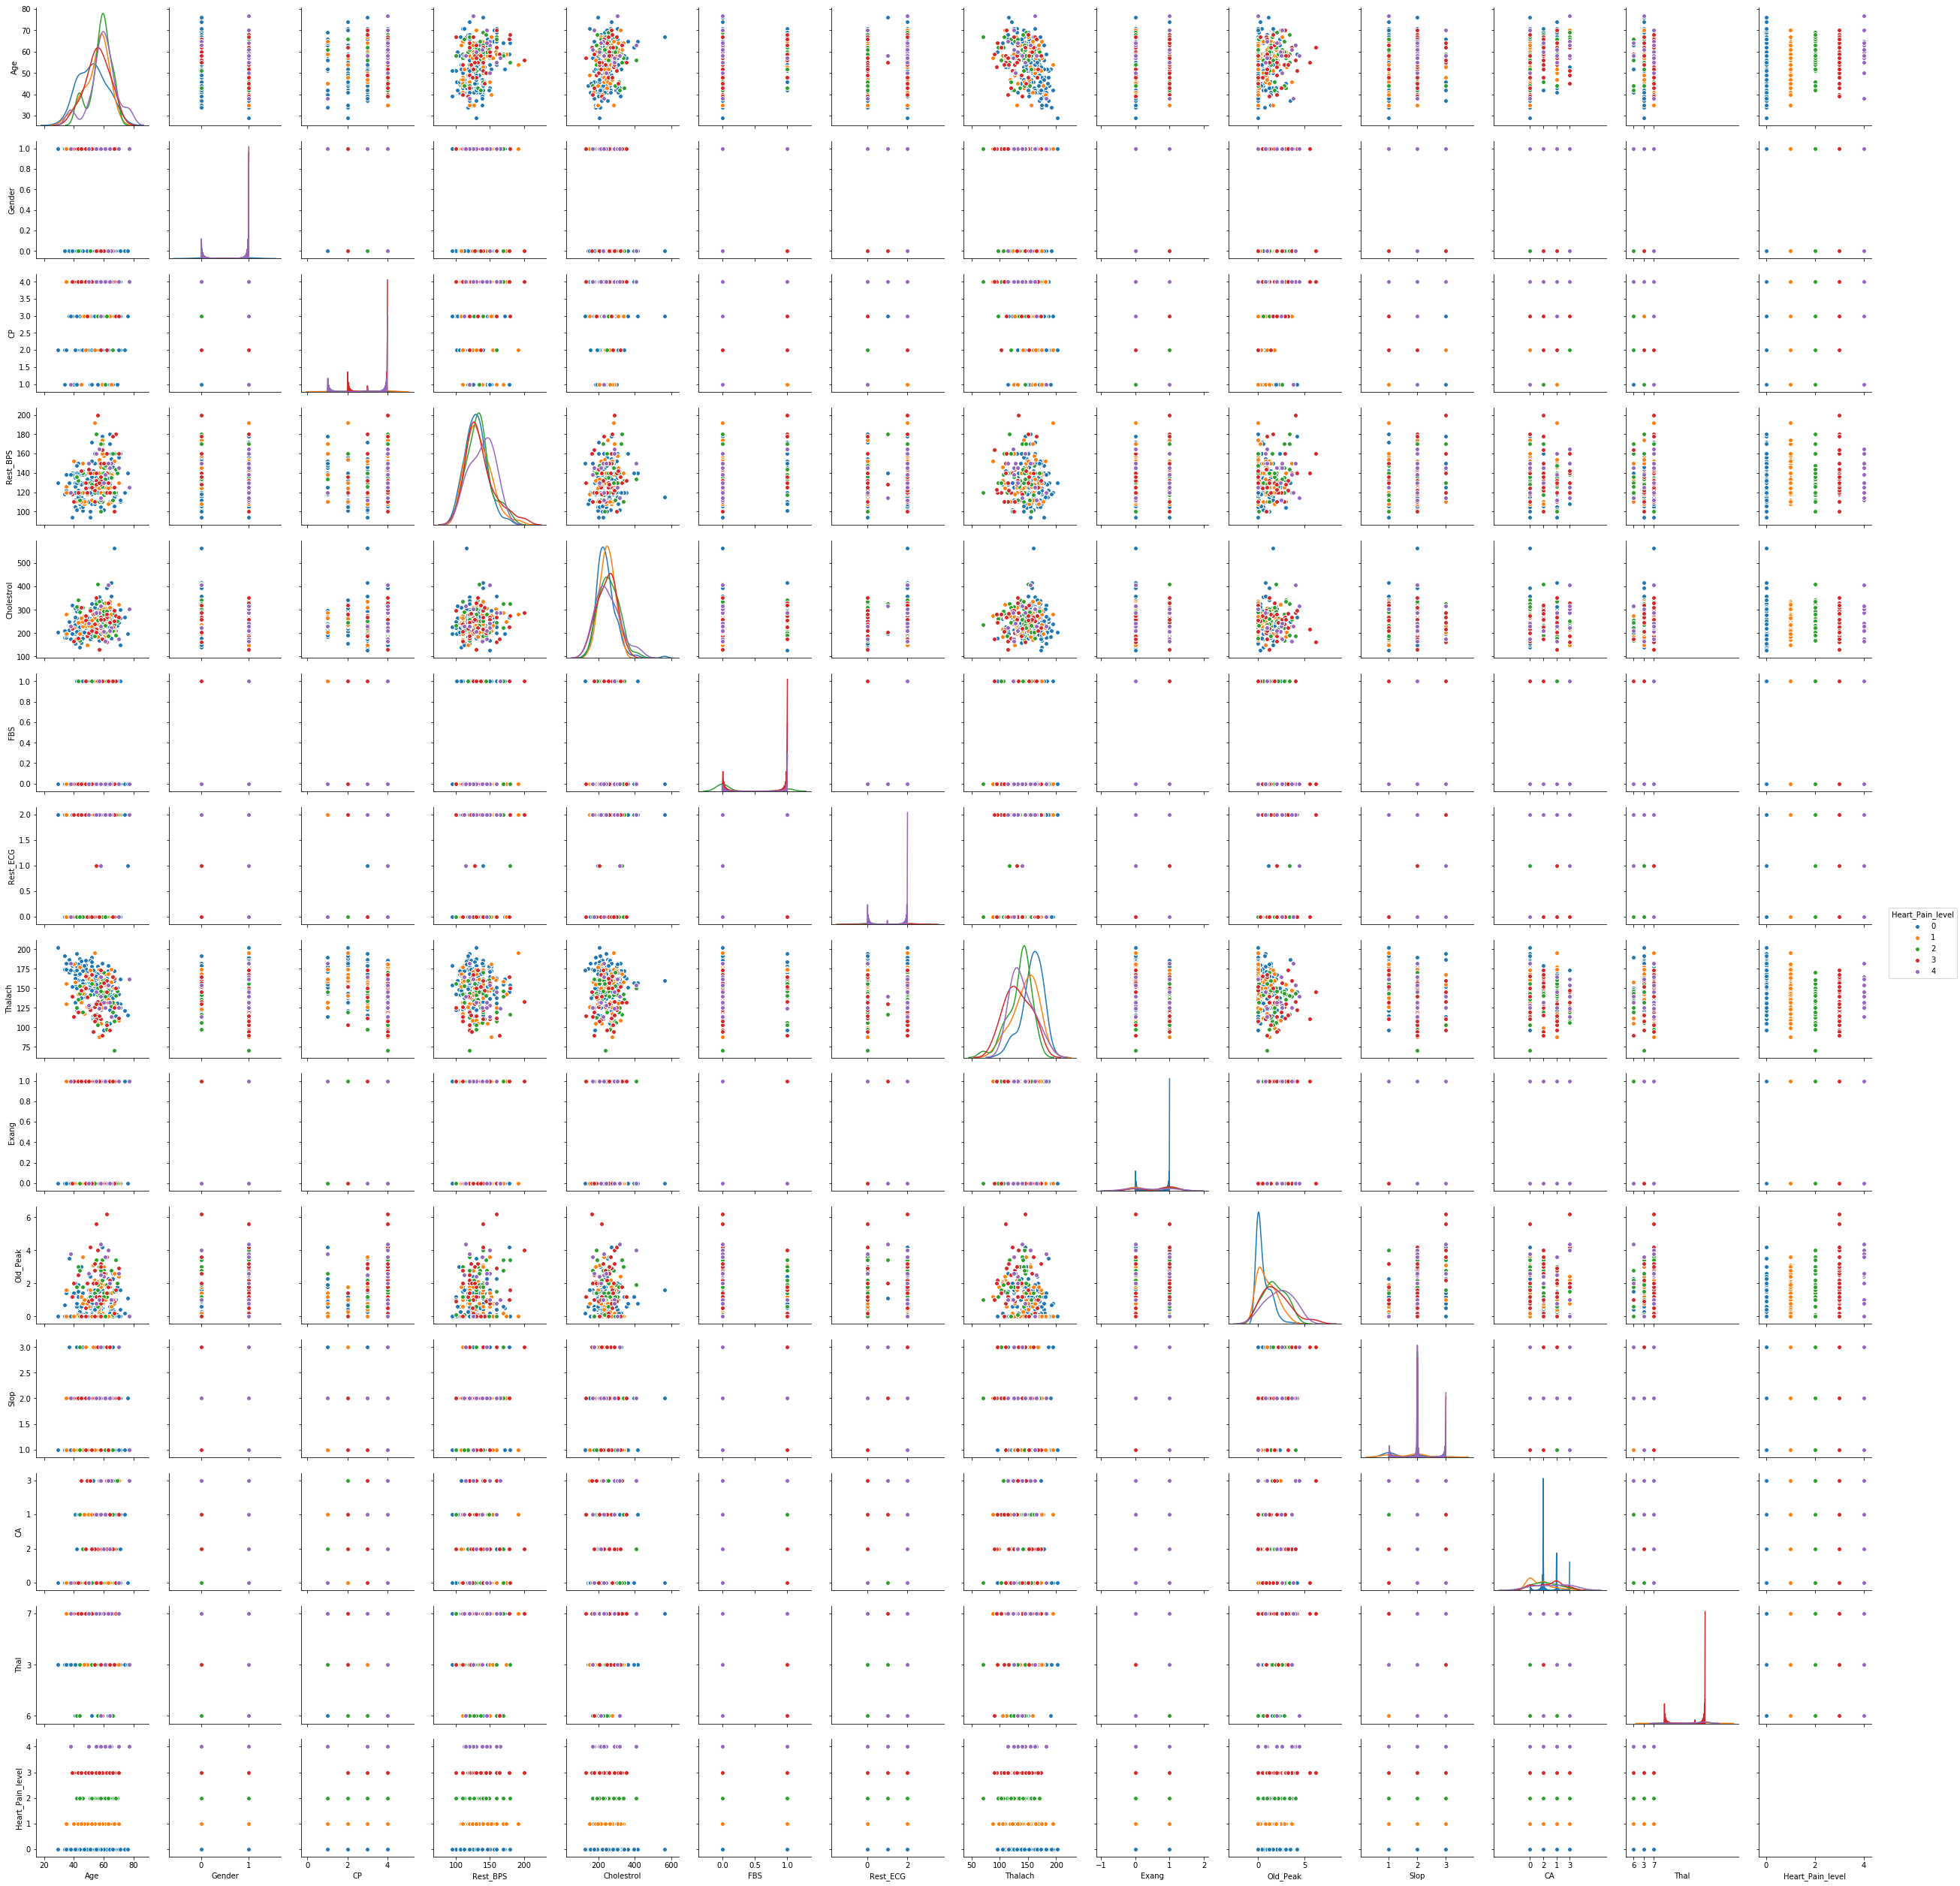

In [331]:
sns.pairplot(heart, diag_kind='kde',hue= "Heart_Pain_level")

## Missing Value Treatment And Outlier Treatment

In [253]:
heart["Rest_ECG"]= heart["Rest_ECG"].astype("object")
heart["CP"]= heart["CP"].astype("object")
heart["Slop"]= heart["Slop"].astype("object")

In [254]:
heart['Thal'] = heart['Thal'].replace('?', '3')

In [255]:
heart['Thal'].value_counts()

3    168
7    117
6     18
Name: Thal, dtype: int64

In [256]:
heart['CA'] = heart['CA'].replace('?', '0')

In [257]:
heart['CA'].value_counts()

0    180
1     65
2     38
3     20
Name: CA, dtype: int64

In [258]:
heart_norm= heart[['Rest_BPS', 'Cholestrol','Thalach','Old_Peak']]

In [97]:
from scipy.stats import zscore

In [259]:
heart_norm= np.log(heart_norm + 1)

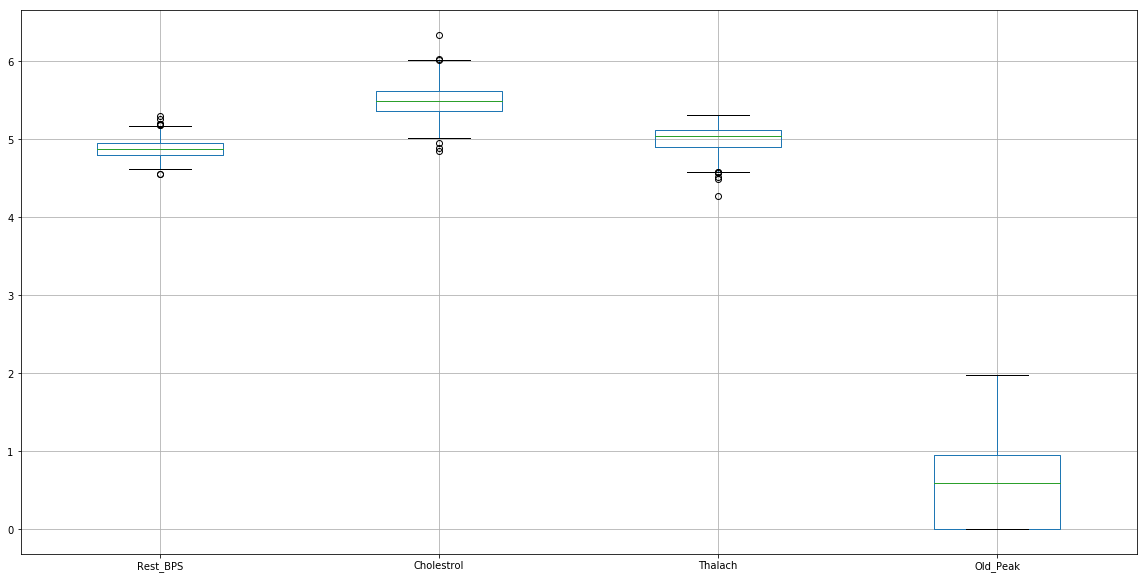

In [205]:
heart_norm.boxplot(column=['Rest_BPS', 'Cholestrol','Thalach','Old_Peak'], figsize=(20,10))

## Creating Dummy Variables

In [260]:
heart.columns

Index(['Age', 'Gender', 'CP', 'Rest_BPS', 'Cholestrol', 'FBS', 'Rest_ECG',
       'Thalach', 'Exang', 'Old_Peak', 'Slop', 'CA', 'Thal',
       'Heart_Pain_level'],
      dtype='object')

In [261]:
heart_dummies= pd.get_dummies(heart[['CP', 'Rest_ECG', 'Slop','CA', 'Thal']])

In [248]:
heart_dummies.head()

,CP_1,CP_2,CP_3,CP_4,Rest_ECG_0,Rest_ECG_1,Rest_ECG_2,Slop_1,Slop_2,Slop_3,CA_0,CA_1,CA_2,CA_3,Thal_3,Thal_6,Thal_7
0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0
2,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1
3,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0
4,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0


In [262]:
heart_final= pd.concat([heart_norm, heart_dummies], 1)

In [263]:
heart1= heart[["Age", "Gender", "FBS", "Exang", "Heart_Pain_level"]]

### Now, we concatenate all the dataframes we formed seperately to form our final data frame

In [264]:
heart_final= pd.concat([heart_final, heart1], 1)

In [265]:
heart_final.head()

,Rest_BPS,Cholestrol,Thalach,Old_Peak,CP_1,CP_2,CP_3,CP_4,Rest_ECG_0,Rest_ECG_1,...,CA_2,CA_3,Thal_3,Thal_6,Thal_7,Age,Gender,FBS,Exang,Heart_Pain_level
0,4.983607,5.455321,5.017280,1.193922,1,0,0,0,0,0,...,0,0,0,1,0,63,1,1,0,0
1,5.081404,5.659482,4.691348,0.916291,0,0,0,1,0,0,...,0,1,1,0,0,67,1,0,1,2
2,4.795791,5.438079,4.867534,1.280934,0,0,0,1,0,0,...,1,0,0,0,1,67,1,0,1,1
3,4.875197,5.525453,5.236442,1.504077,0,0,1,0,1,0,...,0,0,1,0,0,37,1,0,0,0
4,4.875197,5.323010,5.153292,0.875469,0,1,0,0,0,0,...,0,0,1,0,0,41,0,0,0,0


In [238]:
heart_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 19 columns):
Rest_BPS            303 non-null float64
Cholestrol          303 non-null float64
Thalach             303 non-null float64
Old_Peak            303 non-null float64
CP                  303 non-null int32
Rest_ECG            303 non-null int32
Slop                303 non-null int32
CA_0                303 non-null uint8
CA_1                303 non-null uint8
CA_2                303 non-null uint8
CA_3                303 non-null uint8
Thal_3              303 non-null uint8
Thal_6              303 non-null uint8
Thal_7              303 non-null uint8
Age                 303 non-null int64
Gender              303 non-null int64
FBS                 303 non-null int64
Exang               303 non-null int64
Heart_Pain_level    303 non-null int64
dtypes: float64(4), int32(3), int64(5), uint8(7)
memory usage: 27.0 KB


## Splitting the Data

In [268]:
x= heart_final.drop("Heart_Pain_level", 1)

In [269]:
y= heart_final["Heart_Pain_level"]

In [270]:
from sklearn.model_selection import train_test_split
xtrain,xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 123)

## Applying Basic Models

In [290]:
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression(random_state = 123,solver= "sag")
lr1.fit(xtrain, ytrain)
lr_predict1 = lr1.predict(xtest)
print(metrics.accuracy_score(ytest, lr_predict1))

0.6373626373626373


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

In [294]:
knn1=KNeighborsClassifier()
model_knn1= knn1.fit(xtrain, ytrain)
pred_knn1= knn1.predict(xtest)
print(metrics.accuracy_score(ytest, pred_knn1))

0.6043956043956044


In [297]:
dtree1 = DecisionTreeClassifier()
model_dtree1 = dtree1.fit(xtrain,ytrain)
pred_dtree1 = model_dtree1.predict(xtest)
metrics.accuracy_score(ytest, pred_dtree1)

0.4835164835164835

In [298]:
rf1 = RandomForestClassifier()
model_rf1 = rf1.fit(xtrain,ytrain)
pred_rf1 = model_rf1.predict(xtest)
metrics.accuracy_score(ytest, pred_rf1)

0.5824175824175825

In [299]:
from sklearn.naive_bayes import BernoulliNB
nbb1 = BernoulliNB()
nbb1= nbb1.fit(xtrain, ytrain)
nbb_predict1= nbb1.predict(xtest)
metrics.accuracy_score(ytest, nbb_predict1)

0.6043956043956044

In [310]:
svc=SVC(kernel="rbf", C=10, gamma=1)
svc.fit(xtrain,ytrain)
svc_predict= svc.predict(xtest)
metrics.accuracy_score(ytest, svc_predict)

0.5494505494505495

## Voting Classifier

In [311]:
voting_model = VotingClassifier([('lr1', lr1),('dtree1', dtree1),('knn1',knn1),('rf1', rf1), ('nbb1', nbb1), ('svc', svc)], voting='hard')
voting_model.fit(xtrain, ytrain)
voting_predict = voting_model.predict(xtest)
metrics.accuracy_score(ytest, voting_predict)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

0.6263736263736264

## Applying LDA as it is a Multiclass Problem

In [272]:
# Applying LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 4)
x_train = lda.fit_transform(xtrain, ytrain)
x_test = lda.transform(xtest)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


## Applying Basic Models Applied with LDA


In [291]:
# passing solver= sag
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0, solver= 'sag')
lr.fit(x_train, ytrain)
lr_predict = lr.predict(x_test)
print(metrics.accuracy_score(ytest, lr_predict))

0.6703296703296703


In [295]:
knn=KNeighborsClassifier()
model_knn= knn.fit(x_train, ytrain)
pred_knn= knn.predict(x_test)
print(metrics.accuracy_score(ytest, pred_knn))



0.5714285714285714


In [278]:
dtree = DecisionTreeClassifier()
model_dtree = dtree.fit(x_train,ytrain)
pred_dtree = model_dtree.predict(x_test)
metrics.accuracy_score(ytest, pred_dtree)

0.46153846153846156

In [279]:
rf = RandomForestClassifier()
model_rf = rf.fit(x_train,ytrain)
pred_rf = model_rf.predict(x_test)
metrics.accuracy_score(ytest, pred_rf)

0.5934065934065934

In [285]:
from sklearn.naive_bayes import BernoulliNB
nbb = BernoulliNB()
nbb= nbb.fit(x_train, ytrain)
nbb_predict= nbb.predict(x_test)
metrics.accuracy_score(ytest, nbb_predict)

0.6593406593406593

In [312]:
svc1=SVC(kernel="rbf", C=10, gamma=1)
svc1.fit(x_train,ytrain)
svc_predict1= svc1.predict(x_test)
metrics.accuracy_score(ytest, svc_predict1)

0.4945054945054945

## Voting Classifier for Models with LDA applied

In [313]:
voting_model = VotingClassifier([('lr', lr),('dtree', dtree),('knn',knn),('rf', rf), ('nbb', nbb), ('svc1', svc1)], voting='hard')
voting_model.fit(xtrain, ytrain)
voting_predict = voting_model.predict(xtest)
metrics.accuracy_score(ytest, voting_predict)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

0.6043956043956044

## Random Forest Tuning

In [304]:
rf_param = {
    'n_estimators':[200,250,300],
    'criterion':['gini','entropy'],
    'max_depth':[4,5,6,7,8],
    'max_features':['auto','sqrt','log2'],
    'bootstrap':[True,False]
}



In [305]:
grid_search = GridSearchCV(estimator=rf, param_grid=rf_param, cv=5)
cv_grid = grid_search.fit(x_train,ytrain)
cv_grid.best_params_



{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'log2',
 'n_estimators': 200}

In [306]:
rf_tuned = RandomForestClassifier(n_estimators= 200, bootstrap= False, criterion='entropy', max_depth= 4, max_features= 'log2')
model_rf_tuned = rf_tuned.fit(x_train,ytrain)
pred_rf_tuned = model_rf_tuned.predict(x_test)
metrics.accuracy_score(ytest, pred_rf_tuned)

0.6153846153846154

## Applying  Cross Validation

In [307]:
l = []
for model in [lr,rf_tuned, nbb]:
    Scores = cross_val_score(model, x, y, scoring='accuracy', cv=5)
    l.append(Scores.mean())
l

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

[0.5971208848336007, 0.5809479634426529, 0.5709461110762548]

In [308]:
l1 = []
for model in [lr,rf_tuned, nbb]:
    Scores = cross_val_score(model, x, y, scoring='accuracy', cv=10)
    l1.append(Scores.mean())
l1

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

[0.6015892026494084, 0.5610527901371893, 0.5715669526987657]

## Applying Ensemble Techniques on the Best Models

### Bernoulli Naive Bayes, Logistic Regression, Tuned Random forest

## Bagging

In [314]:
bagg = BaggingClassifier()
bagg_param = {
    'n_estimators':[5,10,15,20,25],
    'oob_score':[True,False],
    'random_state':[123]
}

grid_search = GridSearchCV(estimator=bagg, param_grid=bagg_param, cv=5)
cv_grid = grid_search.fit(x_train,ytrain)
cv_grid.best_params_

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:605: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:610: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:605: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:610: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:605: UserWarning: Some inputs do not have OOB scores. This probabl

{'n_estimators': 5, 'oob_score': True, 'random_state': 123}

In [316]:
bagg_rf = BaggingClassifier(base_estimator=rf_tuned,n_estimators=5, bootstrap=True, oob_score=True, random_state=123)
model_bagg_rf = bagg_rf.fit(x_train,ytrain)
pred_bagg_rf = model_bagg_rf.predict(x_test)
metrics.accuracy_score(ytest, pred_bagg_rf)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:605: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:610: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


0.6373626373626373

In [317]:
bagg_nbb = BaggingClassifier(base_estimator=nbb,n_estimators=5, bootstrap=True, oob_score=True, random_state=123)
model_bagg_nbb = bagg_nbb.fit(x_train,ytrain)
pred_bagg_nbb = model_bagg_nbb.predict(x_test)
metrics.accuracy_score(ytest, pred_bagg_nbb)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:605: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:610: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


0.6153846153846154

In [320]:
bagg_lr = BaggingClassifier(base_estimator=lr,n_estimators=5, bootstrap=True, oob_score=True, random_state=123)
model_bagg_lr = bagg_lr.fit(x_train,ytrain)
pred_bagg_lr = model_bagg_lr.predict(x_test)
metrics.accuracy_score(ytest, pred_bagg_lr)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:605: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:610: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


0.6483516483516484

## Adaptive Boosting

In [321]:
adb_lr = AdaBoostClassifier(lr, n_estimators=10, learning_rate=1)
adb_lr.fit(x_train,ytrain)
pred_adb_lr = adb_lr.predict(x_test)
metrics.accuracy_score(ytest,pred_adb_lr)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

0.6373626373626373

In [322]:
adb_nbb = AdaBoostClassifier(nbb, n_estimators=10, learning_rate=1)
adb_nbb.fit(x_train,ytrain)
pred_adb_nbb = adb_nbb.predict(x_test)
metrics.accuracy_score(ytest,pred_adb_nbb)

0.6593406593406593

In [324]:
adb_rf = AdaBoostClassifier(rf_tuned, n_estimators=10, learning_rate=1)
adb_rf.fit(x_train,ytrain)
pred_adb_rf = adb_rf.predict(x_test)
metrics.accuracy_score(ytest,pred_adb_rf)

0.5494505494505495

## EXGBOOST Classifier

In [327]:
from xgboost import XGBClassifier
xgboost = XGBClassifier()
model_xg = xgboost.fit(x_train, ytrain)
pred_xgboost = xgboost.predict(x_test)
metrics.accuracy_score(ytest, pred_xgboost)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.6043956043956044

After Applying all the techniques to our model , we conclude that our best model is formed when we apply LDA and Logistic Regression with solver= sag, with accuracy= 67%